
#**Wordcloud mit Stopwort entfernung**

Im folgden will ich euch kurz zeigen wie man aus einem Text oder csv Datei eine Stopwort entfenung durch führt, und anschließend die Ergebnisse in einer Wordcloud darstelllen


In [ ]:
import pandas as pd
print ("pandas", pd.__version__)
import numpy as np
print ("numpy", np.__version__)
import nltk
print ("nltk", nltk.__version__)
import re
print ("re", re.__version__)
from nltk.tokenize import RegexpTokenizer

pandas 1.1.5
numpy 1.19.5
nltk 3.2.5
re 2.2.1


So kann mann auf seinen **Google dirve** zugreifen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


So kann man Daten einlesen, Pandas bittet so genannte **Dataframes**, in die man seine Daten laden, damit kann mann sie leichter und schneller maipuliren.

mit  **.read_exel** lesen wir eine Exel ein.
mit **.read_csv** würde eine CSV einlesen. es gibt also möglichkeiten.

**skiprows = X** läst uns X rows "wegwerfen"

Wie immer kann man solche "Zusätze" in den jeweiligen Dokumentationen nachschauen. 

In [ ]:
data = pd.read_json("/content/drive/MyDrive/Colab Notebooks/reddit.json")
data

,body,id,score,title
0,"Now I have to say ""Leroy can you please paint ...",5tz52q,1,I hate how you cant even say black paint anymore
1,Pizza doesn't scream when you put it in the ov...,5tz4dd,0,What's the difference between a Jew in Nazi Ge...
2,...and being there really helped me learn abou...,5tz319,0,I recently went to America....
3,A Sunday school teacher is concerned that his ...,5tz2wj,1,"Brian raises his hand and says, “He’s in Heaven.”"
4,He got caught trying to sell the two books to ...,5tz1pc,0,You hear about the University book store worke...
...,...,...,...,...
40804,Mediocre meaty ochre.,4n0hy6,1,What do you call bad black paint made out of m...
40805,IHOP,4n0f4q,2,Where does a person with one leg work?
40806,Droid Sans,4n0ci8,0,What is Obi Wan's favorite font?
40807,It's the only place I can buy 400 cantaloupes ...,4n09ud,1,"Even though I hate it, math is special."


Mit **[ ]** wählen wir eine Spalte aus,( hier erzeugen wir sogar erst noch eine neue. In die wir den text kleingeschrieben abspeichern, das reduziert dopplungen, in dem es **DU, Du, dU und du -> du** macht

In [ ]:
dtype = data.dtypes

dtype

In [ ]:
data["tokens"] = data["title"].str.lower()

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')#hier bauen wir eine Tokenizer um ihn anschlißend zu verwenden. KA was die Paramter in der klammer sind, kann man aber nachschauen ;)
data["tokens"] = data.apply(lambda row: tokenizer.tokenize(str(row["tokens"])), axis=1)

In [ ]:
data["tokens"]

0        [i, hate, how, you, cant, even, say, black, pa...
1        [what, s, the, difference, between, a, jew, in...
2                         [i, recently, went, to, america]
3        [brian, raises, his, hand, and, says, he, s, i...
4        [you, hear, about, the, university, book, stor...
                               ...                        
40804    [what, do, you, call, bad, black, paint, made,...
40805       [where, does, a, person, with, one, leg, work]
40806              [what, is, obi, wan, s, favorite, font]
40807       [even, though, i, hate, it, math, is, special]
40808    [what, do, you, call, a, woman, who, raps, abo...
Name: tokens, Length: 40809, dtype: object

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords_from_list(list_in, language):
  return [a for a in list_in if a not in nltk.corpus.stopwords.words(language)]

In [ ]:
data["tokens"] = data.apply(lambda row: remove_stopwords_from_list(row["tokens"], "english"), axis=1)
data["tokens"]

0           [hate, cant, even, say, black, paint, anymore]
1                  [difference, jew, nazi, germany, pizza]
2                                [recently, went, america]
3                      [brian, raises, hand, says, heaven]
4        [hear, university, book, store, worker, charge...
                               ...                        
40804                [call, bad, black, paint, made, meat]
40805                             [person, one, leg, work]
40806                           [obi, wan, favorite, font]
40807                  [even, though, hate, math, special]
40808    [call, woman, raps, men, pigs, rapists, murder...
Name: tokens, Length: 40809, dtype: object

In [ ]:
#Ich muss noch die Tokens wieder zu einem Sting zusammen führen.
#data["tokens"] = data["tokens"].astype

## **Wordcloud part**

https://www.datacamp.com/community/tutorials/wordcloud-python Ich bin leider noch nicht dazu gekommen das alles wirklich "perfekt" auszuarbeiten. 

Mann kann auch coustum Formen angeben, da wäre das Corona virus logo nartülich cool.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
text = " ".join(review for review in data.title)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1909700 words in the combination of all review.


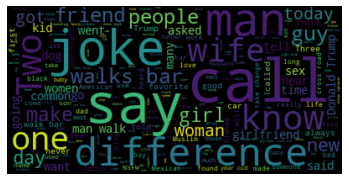

In [ ]:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()